In [2]:

import logging
import pickle
import dill
import numpy as np
import matplotlib.pyplot as plt

#from src.emulator import Emulator
from src.emulator_BAND import EmulatorBAND

In [3]:
def loadEmulator(emulatorPathList):
        emuList = []
        for i, emuPath in enumerate(emulatorPathList):
            with open(emuPath, 'rb') as f:
                emu_i = dill.load(f)
                emuList.append(emu_i)
        logging.info("Number of Emulators: {}".format(len(emuList)))
        return emuList

In [4]:
#The EMULATOR and the DATA file have to FIT together
folder = "/home/niklas/Desktop/lustre/good_bayes/inference/actual/emulator_full/no_log/no_pca/PCGP/"
emuPathList = [folder+"data:allenergies:allsystems:base-star-eta:3.5:nostarptcut_nolog_nopca_PCGP"
            ]

emu_list = loadEmulator(emuPathList)

[INFO][480296221] Number of Emulators: 1


In [5]:
#TODO: Redo in the center of posterior distribution!!!

file_path = '/home/niklas/Desktop/lustre/good_bayes/inference/actual/latent_train_full/data:allenergies:allsystems:base-star-eta:3.5:nostarptcut.pkl'

with open(file_path,'rb') as file:
    loaded_data = pickle.load(file)

In [6]:
# for key in loaded_data.keys():
#     a = key

# #print(loaded_data.keys())
# #print(a)
# #HERE WE CHOOSE WHICH INDEX!!!
# a=498
# num_obs = len(loaded_data[a]['obs'][0])
# #print(num_obs)
# num_param = len(loaded_data[a]['parameter'])
# #print(num_param)
# response_matrix = np.zeros((num_obs, num_param))

# X = np.array(loaded_data[a]['parameter'],  ndmin = 2)
# #print(X.shape)
# for j in range(num_param):
#     #print("j is ", j)
#     X_h_1 = np.copy(X)
#     X_h_2 = np.copy(X)
#     #print(X_h_1)
#     h = 0.1*X_h_1[0,j]
#     X_h_1[0, j] = X_h_1[0, j] + h
#     X_h_2[0, j] = X_h_2[0, j] - h
#     #print(X_h_1)
#     Y_h_1 = []
#     Y_h_2 = []
#     for emu in emu_list:
#         Y_h_1.append(emu.predict(X_h_1, return_cov = False))
#         #print("Y_h_1 is ", Y_h_1)
#         #print(len(Y_h_1))
#         Y_h_2.append(emu.predict(X_h_2, return_cov = False))
#         #print(len(Y_h_2))
#     Y_h_1_ = np.concatenate(Y_h_1, axis = 1)
#     #print(Y_h_1_.shape)
#     Y_h_2_ = np.concatenate(Y_h_2, axis = 1)
#     #print(Y_h_2_.shape)
#     #print(h.shape)
#     #print(X[0, j].shape)
#     #print(response_matrix[:, j].shape)
    
#     response_matrix[:, j] = (Y_h_1_[0,:] - Y_h_2_[0,:])/(2*h)*X[0, j]/(Y_h_1_[0,:]+Y_h_2_[0,:])*2
        

In [7]:
PARAMETER_NAMES = [
r'$\tau_{IC,scale}\;({\rm fm})$',
r'$a_{h,\eta}$',
r'$a_{l,\eta}$',
r'$\epsilon_{\rm sw}\;({\rm GeV/fm^3})$',
r'$(\eta/s)_{\rm min}$',
r'$a_{\mu_B}$',
r'$b_{\mu_B}$',
r'$R_{\perp}$',
r'$R_{\eta}$',
r'$T_{\eta, \rm 0}\;({\rm GeV})$',
r'$(\zeta/s)_{\rm 0}$',
r'$(\epsilon)_{\zeta,\rm 0 }\;({\rm GeV/fm^3})$',
r'$\sigma_{\zeta, \rm -}\;({\rm GeV})$',
r'$\sigma_{\zeta, \rm +}\;({\rm GeV})$',
r'$\sigma_{\rm AB, scale}$',
]

x = np.arange(len(PARAMETER_NAMES))

In [8]:
def extract_info_from_filename(filename):
    # Remove the path and extension
    parts = filename.split('_')
    
    # Extract energy, centrality, and observable
    energy = parts[1]
    centrality = parts[2]
    observable = '_'.join(parts[3:])


    
    return energy, centrality, observable

import re

def convert_to_notation(filename):
    # Remove 'exp_', '../latent_pickled/', and '.pkl'
    filename = re.sub(r'(exp_|\.pkl|../latent_pickled/)', '', filename)
    filename = re.sub(r'star_v(.*)_pT', r'starv\1pt', filename)
    filename = re.sub(r'star_v', 'starv', filename)
    filename = re.sub(r'phenix_pT_v', 'phenixptv', filename)
    filename = re.sub(r'stareta_spectra', 'etas', filename)
    filename = re.sub(r'eta_spectra', 'etas', filename)
    filename = re.sub(r'y_spectra', 'ys', filename)
    filename = re.sub(r'pT_spectra', 'pTs', filename)
    filename = re.sub(r'phobos_v2_spectra', 'v2eta', filename)
    # Mapping for observables
    observables = {
        'etas': r'$\frac{dN}{d\eta}$',
        'ys': r'$\frac{dN}{dy}$',
        'pTs': r'$\frac{dN}{d(p_T)}$',
        'dNdy': r'$\left.\frac{dN}{dy}\right|_{y=0}$',
        'meanpT': r'$\langle p_T \rangle |_{y=0}$',
        'starv2': r'$\left.v_{2/3}\right.\{2\}$',
        'starv3': r'',
        'phenixptv2': r'$v_2(p_T)$',
        'phenixptv3': r'$v_3(p_T)$',
        'starv2pt': r'$v_2(p_T)$',
        'starv3pt': r'$v_3(p_T)$',
        'v2eta': r'$v_2(\eta)$'
    }
    particles= {
        'kminus': r'K^-',
        'kplus': r'K^+',
        'p': 'p',
        'pbar': r'\bar{p}',
        'piminus': r'\pi^-',
        'piplus': r'\pi^+'
    }   
    
    # Identify the particle and the observable
    #print(filename)
    parts = filename.split('_')
    #print(parts)
    particle = ''
    observable = ''
    integrated = False
    for part in parts:
        if part in observables:
            observable = observables[part]
        elif part in particles:
            particle = particles[part]
        elif part == 'integrated':
            integrated = True
    # Add particle notation for y_spectra
    if integrated and ("star" not in parts[1]) and ((parts[2] == 'kplus' and parts[1]  == 'dNdy') or (parts[2]  == 'kminus' and parts[1] == 'meanpT')):
        pass
    elif integrated and particle != '':
        observable = ''
    elif ('ys' in filename or 'pTs' in filename or integrated) and not 'star' in filename:
        observable = observable[:-1] + f'({particle})$'

   
    #print(observable)
    #print("------")
    # Return the formatted string
    return observable

from collections import defaultdict
import numpy as np

# Extract relevant information and store in a list of tuples
data_list = []
for i, name in enumerate(loaded_data[0]["name"]):
    energy, centrality, observable = extract_info_from_filename(name)
    start = loaded_data[0]["lim"][i]
    end = loaded_data[0]["lim"][i + 1]
    data_list.append((energy, centrality, observable, start, end, i))

# Define a custom order for the energy
energy_order = {'7.7': 0, '19.6': 1, '200': 2}

# Sort the list of tuples by the custom energy order and then by centrality
data_list.sort(key=lambda x: (energy_order[x[0]], x[1]))

# Recalculate ytickPos based on the sorted order
yticksLabel = []
ytickPos = []
yInfo = []
current_pos = 0
for energy, centrality, observable, start, end, original_index in data_list:
    space = end - start
    mid_pos = current_pos + space / 2
    yticksLabel.append(convert_to_notation(observable))
    ytickPos.append(mid_pos)
    yInfo.append((energy, centrality, space / 2))
    current_pos += space
#for i in range(len(yInfo)):
    #print(yInfo[i])
# Calculate the response matrix
num_obs = len(loaded_data[1]['obs'][0])
num_param = len(loaded_data[1]['parameter'])
response_matrix = np.zeros((num_obs, num_param))
num_points=50
for a in range(num_points):
    print(a)
    

    X = np.array(loaded_data[a]['parameter'], ndmin=2)
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    X_scaled = (X - X_min) / (X_max - X_min + 1e-8)
    for j in range(num_param):
        X_h_1 = np.copy(X_scaled)
        X_h_2 = np.copy(X_scaled)
        h = 0.1 * X_h_1[0, j]
        if h == 0:
            h = 1e-8  # Set a small epsilon if h is zero
        X_h_1[0, j] = X_h_1[0, j] + h
        X_h_2[0, j] = X_h_2[0, j] - h
        Y_h_1 = []
        Y_h_2 = []
        for emu in emu_list:
            Y_h_1.append(emu.predict(X_h_1, return_cov=False))
            Y_h_2.append(emu.predict(X_h_2, return_cov=False))
        Y_h_1_ = np.concatenate(Y_h_1, axis=1)
        Y_h_2_ = np.concatenate(Y_h_2, axis=1)
        denominator = (Y_h_1_[0, :] + Y_h_2_[0, :])
        small_value_mask = np.abs(denominator) < 1e-8  # Mask small or zero denominators
        
        # Safely calculate the response matrix with masked values
        safe_denominator = np.where(small_value_mask, 1e-8, denominator)  # Avoid division by zero
        
        response_matrix[:, j] += (Y_h_1_[0, :] - Y_h_2_[0, :]) / (2 * h) * X[0, j] / (safe_denominator * 2*num_points)
        response_matrix[:, j] += (Y_h_1_[0, :] - Y_h_2_[0, :]) / (2 * h) * X[0, j] / ((Y_h_1_[0, :] + Y_h_2_[0, :]) * 2*num_points)

# Apply the same sorting to the response matrix
sorted_response_matrix = np.zeros_like(response_matrix)
current_pos = 0
for energy, centrality, observable, start, end, original_index in data_list:
    space = end - start
    sorted_response_matrix[current_pos:current_pos + space, :] = response_matrix[start:end, :]
    current_pos += space
    #print(energy, centrality, observable, start, end, original_index)

#print(yticksLabel)
#print(ytickPos)
response_matrix = sorted_response_matrix

0


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral


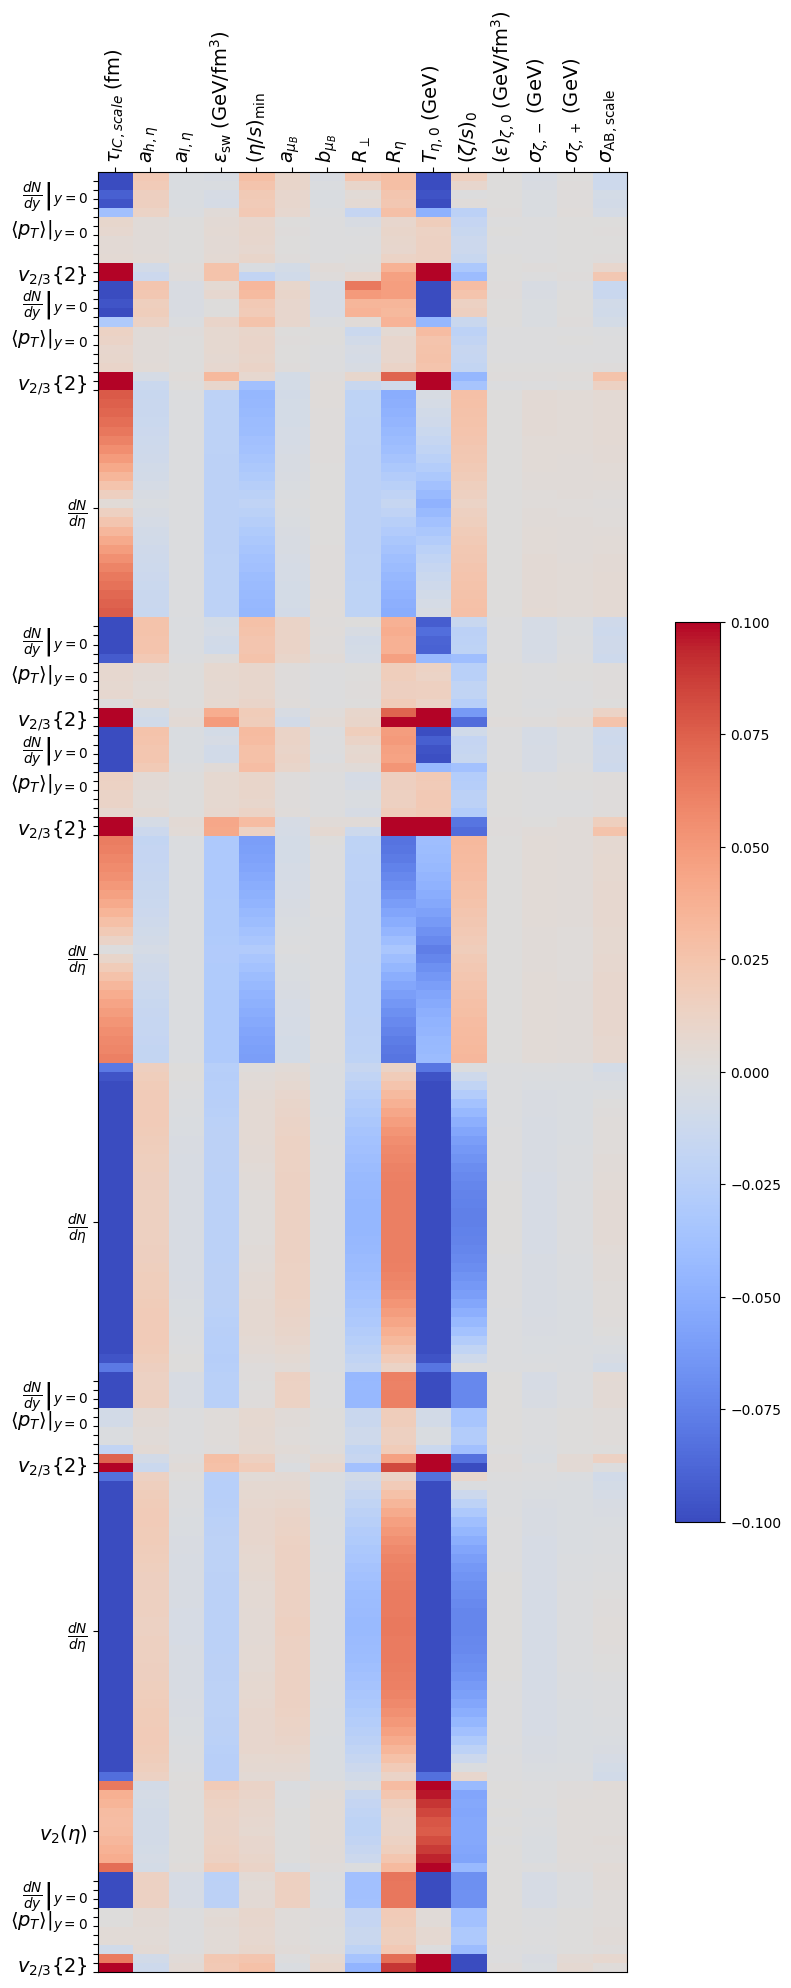

In [9]:
#UNSPLIT

min_value = np.amin(response_matrix)
max_value = np.amax(response_matrix)
c_value = max(min_value, max_value)

height, width = response_matrix.shape
aspect_ratio = 3.4*((width)/(height))

# Split the response matrix into two parts
half_width = width // 2+5
response_matrix_1, response_matrix_2 = np.hsplit(response_matrix, [half_width])

plt.figure(figsize=(10, 20))
plt.imshow(response_matrix, cmap='coolwarm', vmin=-0.1, vmax=0.1, aspect = aspect_ratio, interpolation = 'nearest')
# Add color bar
plt.colorbar(shrink=0.5)  # Adjust shrink value as needed

#yticksLabel=[convert_to_notation(name) for name in data[:][:]["name"]]
#ytickPos=[(start + end) // 2  - 1 for start, end in zip(data[:][:]["lim"][:-1], data[:][:]["lim"][1:])]

# ytickPos = [3, 10, 17, 24, 31, 38, 45, 52, 58, 64, 83, 116, 152, 189, 223,
#             245, 254, 262, 268, 276, 283, 290, 297, 303, 310, 330, 364,
#             398, 433, 468, 486, 493, 500, 507, 514, 521, 528, 534, 540]
# yticksLabel = [r"$dN/dy(\pi^+)$",
#                r"$dN/dy(K^+)$", r"$dN/dy(p)$",
#                r"$dN/dy(\bar{p})$", r"$\langle p_T \rangle(\pi^+)$",
#                r"$\langle p_T \rangle(K^+)$",
#                r"$\langle p_T \rangle(p)$",
#                r"$\langle p_T \rangle(\bar{p})$",
#                r"$v_2\{2\}({\rm ch})$",
#                r"$v_3\{2\}({\rm ch})$",
#                r"$dN^{\rm ch}/d\eta(0-5\%)$",
#                r"$dN^{\rm ch}/d\eta(5-12\%)$",
#                r"$dN^{\rm ch}/d\eta(12-24\%)$",
#                r"$dN^{\rm ch}/d\eta(24-34\%)$",
#                r"$dN^{\rm ch}/d\eta(34-44\%)$",
#                r"$v_2(\eta)(0-40\%)$",
#                r"$dN/dy(\pi^+)$",
#                r"$dN/dy(K^+)$", r"$dN/dy(p)$",
#                r"$\langle p_T \rangle(\pi^+)$",
#                r"$\langle p_T \rangle(K^+)$",
#                r"$\langle p_T \rangle(p)$",
#                r"$\langle p_T \rangle(\bar{p})$",
#                r"$v_2\{2\}({\rm ch})$",
#                r"$v_3\{2\}({\rm ch})$",
#                r"$dN^{\rm ch}/d\eta(0-5\%)$",
#                r"$dN^{\rm ch}/d\eta(5-12\%)$",
#                r"$dN^{\rm ch}/d\eta(12-24\%)$",
#                r"$dN^{\rm ch}/d\eta(24-34\%)$",
#                r"$dN^{\rm ch}/d\eta(34-44\%)$",
#                r"$dN/dy(\pi^+)$",
#                r"$dN/dy(K^+)$", r"$dN/dy(p)$",
#                r"$\langle p_T \rangle(\pi^+)$",
#                r"$\langle p_T \rangle(K^+)$",
#                r"$\langle p_T \rangle(p)$",
#                r"$\langle p_T \rangle(\bar{p})$",
#                r"$v_2\{2\}({\rm ch})$",
#                r"$v_3\{2\}({\rm ch})$",
#              ]

ax = plt.gca()
ax.xaxis.tick_top()
ax.set_yticks(ytickPos)
ax.set_yticklabels(yticksLabel, rotation=0)
plt.yticks(fontsize = 14)
plt.xticks(x, PARAMETER_NAMES, fontsize=14, rotation = 90)
plt.tight_layout()
plt.savefig("heatmap_1099.pdf")
plt.show()


[('7.7', '05', 'integrated_dNdy_kminus', 129, 130, 39), ('7.7', '05', 'integrated_dNdy_kplus', 130, 131, 40), ('7.7', '05', 'integrated_dNdy_piminus', 131, 132, 41), ('7.7', '05', 'integrated_dNdy_piplus', 132, 133, 42), ('7.7', '05', 'integrated_dNdy_p', 133, 134, 43), ('7.7', '05', 'integrated_meanpT_kminus', 134, 135, 44), ('7.7', '05', 'integrated_meanpT_kplus', 135, 136, 45), ('7.7', '05', 'integrated_meanpT_piminus', 136, 137, 46), ('7.7', '05', 'integrated_meanpT_piplus', 137, 138, 47), ('7.7', '05', 'integrated_meanpT_p', 138, 139, 48), ('7.7', '05', 'integrated_star_v2', 139, 140, 49), ('7.7', '05', 'integrated_star_v3', 140, 141, 50), ('7.7', '2030', 'integrated_dNdy_kminus', 186, 187, 63), ('7.7', '2030', 'integrated_dNdy_kplus', 187, 188, 64), ('7.7', '2030', 'integrated_dNdy_piminus', 188, 189, 65), ('7.7', '2030', 'integrated_dNdy_piplus', 189, 190, 66), ('7.7', '2030', 'integrated_dNdy_p', 190, 191, 67), ('7.7', '2030', 'integrated_meanpT_kminus', 191, 192, 68), ('7.7', 

/tmp/ipykernel_989901/3475327659.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral


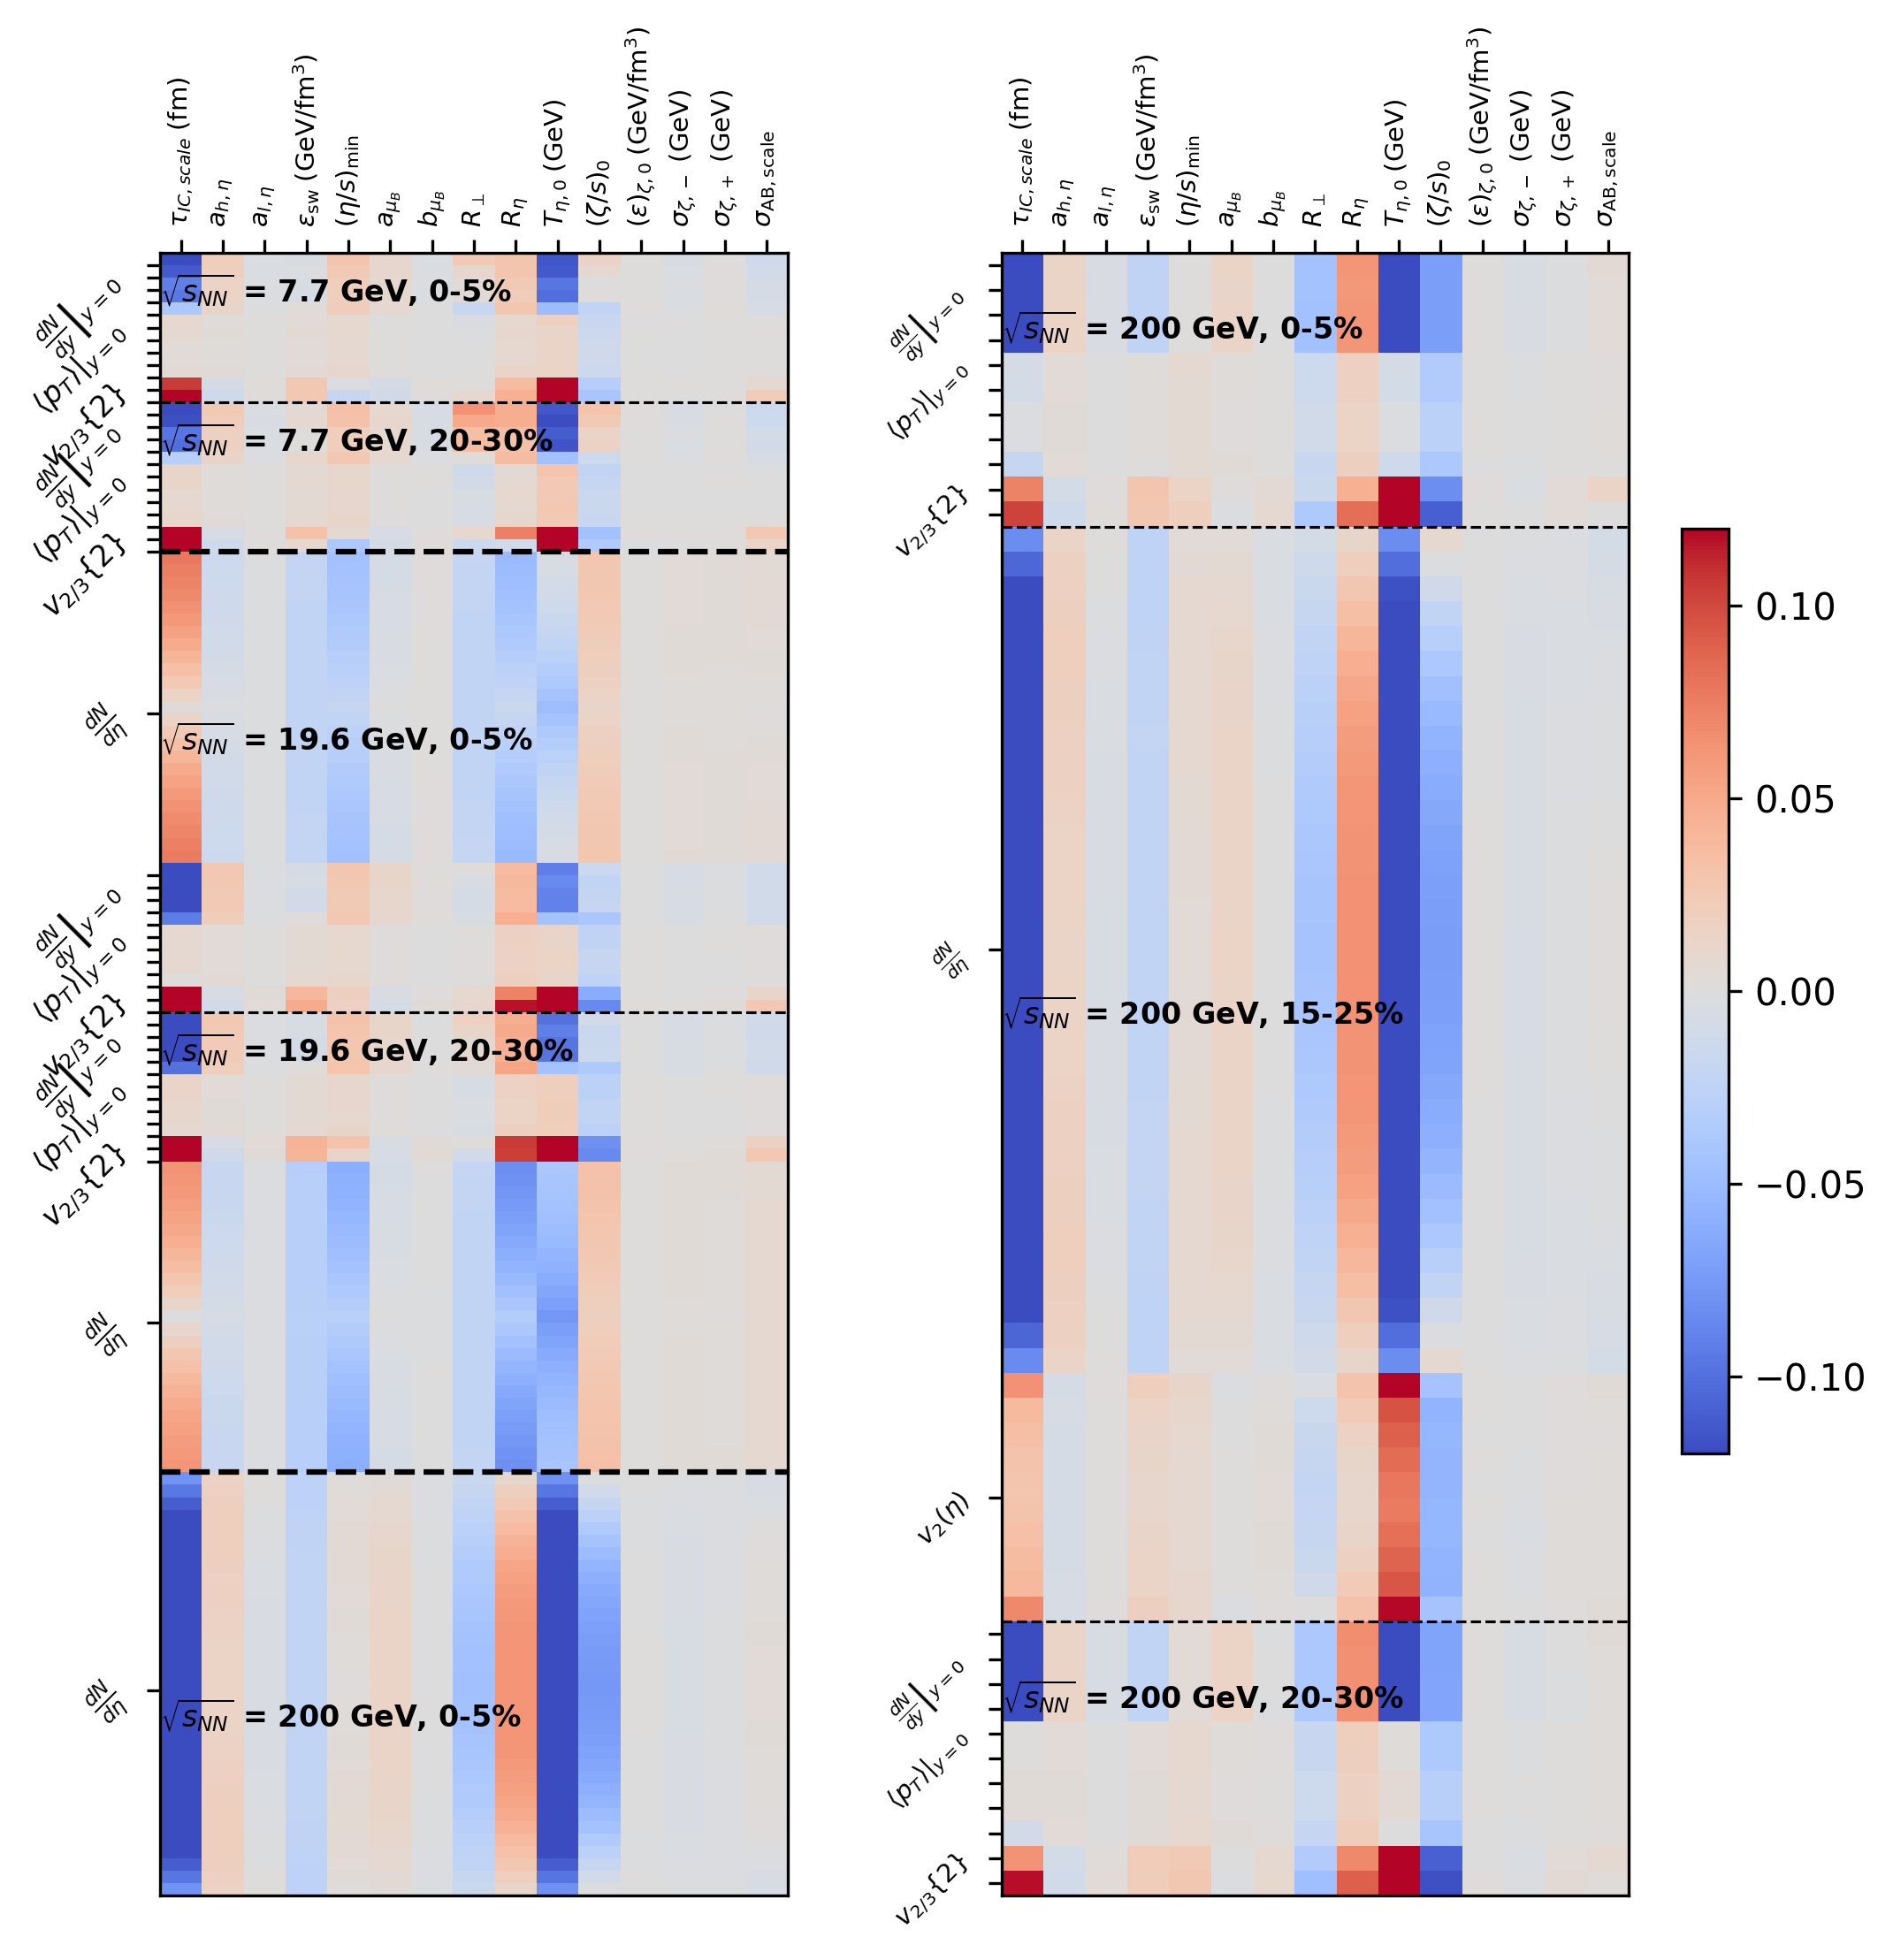

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative number of rows for each label
cumulative_rows = [0]
for _, _, _, start, end, _ in data_list:
    cumulative_rows.append(cumulative_rows[-1] + (end - start))

# Determine the index where to split the matrix, by total rows, not labels
half_total_rows = cumulative_rows[-1] // 2

# Find the index in data_list where the total number of rows surpasses half_total_rows
split_index = next(i for i, cum_row in enumerate(cumulative_rows) if cum_row >= half_total_rows)

# Now split the response matrix at this index
response_matrix_1 = response_matrix[:cumulative_rows[split_index], :]
response_matrix_2 = response_matrix[cumulative_rows[split_index]:, :]

# Split yticksLabel and ytickPos according to the same split index
yticksLabel_1 = yticksLabel[:split_index]
#print(yticksLabel_1)
ytickPos_1 = ytickPos[:split_index]

yticksLabel_2 = yticksLabel[split_index:]
ytickPos_2 = [pos - ytickPos[split_index] for pos in ytickPos[split_index:]]

# Create two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(7.5,7.5 ), dpi=300)

cent = {"05": "0-5", "2030": "20-30", "1525": "15-25", "3050": "30-50"}

# Define a function to draw borders and labels for each subplot
def draw_borders_and_labels(ax, start_index, end_index, current_y_pos):
    current_energy = None
    current_centrality = None
    is_first_section = True  # Flag to track the first section
    if(start_index!=0):
        current_centrality="2030"
    for index in range(start_index, end_index):
        energy, centrality, observable, start, end, original_index = data_list[index]
        space = end - start
        #if (energy=="7.7" and centrality=="05"):
        #    is_first_section = True  # Mark the first section
        # if (energy=='19.6' and centrality=='2030' and start_index==0):
        #     if(current_centrality!=centrality):
        #         ax.axhline(y=current_y_pos, color='black', linestyle='--', linewidth=1)
        #     continue
        # Draw thick dashed line for energy borders, except for the first section
        if not is_first_section and (current_energy is None or current_energy != energy):
            ax.axhline(y=current_y_pos-0.5, color='black', linestyle='--', linewidth=1.5)  # Thick line for energy
            # Update the text position slightly below the line
            ax.text(-0.5, current_y_pos + space / 2 + 2, r'$\sqrt{s_{NN}}$ = ' + energy + ' GeV, ' + cent[centrality] + '%', 
                    verticalalignment='center', fontsize=8, color='black', weight='bold')

        # Draw thin dashed line for centrality borders
        if current_centrality != centrality and current_energy == energy:
            ax.axhline(y=current_y_pos-0.5, color='black', linestyle='--', linewidth=0.75)  # Thin line for centrality
            # Update the text position slightly below the line
            ax.text(-0.5, current_y_pos + space / 2 + 2, r'$\sqrt{s_{NN}}$ = ' + energy + ' GeV, ' + cent[centrality] + '%', 
                    verticalalignment='center', fontsize=8, color='black', weight='bold')
        
        if current_centrality is None: 
            #ax.axhline(y=current_y_pos, color='black', linestyle='-.', linewidth=1)
            ax.text(-0.5, current_y_pos + space / 2 + 2, r'$\sqrt{s_{NN}}$ = ' + energy + ' GeV, ' + cent[centrality] + '%', 
                    verticalalignment='center', fontsize=8, color='black', weight='bold')
        if current_energy is None and start_index!=0:
            ax.text(-0.5, current_y_pos + space / 2 + 2, r'$\sqrt{s_{NN}}$ = ' + energy + ' GeV, ' + cent[centrality] + '%', 
                    verticalalignment='center', fontsize=8, color='black', weight='bold')

        # Update the current energy and centrality
        current_energy = energy
        current_centrality = centrality
        is_first_section = False  # Mark that the first section has been processed

        # Update current y position after processing the current observable
        current_y_pos += space

    return current_y_pos

# Plot the first half of the response matrix (left observables)
aspect_ratio_1 = response_matrix_1.shape[1] / response_matrix_1.shape[0]
im1 = axs[0].imshow(response_matrix_1, cmap='coolwarm', vmin=-0.12, vmax=0.12, aspect=aspect_ratio_1*2.618, interpolation='nearest')
axs[0].xaxis.tick_top()
axs[0].set_yticks(ytickPos_1)
axs[0].set_yticklabels(yticksLabel_1, rotation=45, fontsize=8)  # Increased fontsize

# Draw borders and labels for the first subplot
current_y_pos_1 = 0  # Starting y position for the first subplot
draw_borders_and_labels(axs[0], 0, len(data_list[:split_index]), current_y_pos_1)
print(data_list[:split_index])
#Plot the second half of the response matrix (right observables)
aspect_ratio_2 = response_matrix_2.shape[1] / response_matrix_2.shape[0]
im2 = axs[1].imshow(response_matrix_2, cmap='coolwarm', vmin=-0.12, vmax=0.12, aspect=aspect_ratio_2*2.618, interpolation='nearest')
axs[1].xaxis.tick_top()
axs[1].set_yticks(ytickPos_2)
axs[1].set_yticklabels(yticksLabel_2, rotation=45, fontsize=7)  # Increased fontsize

# Draw borders and labels for the second subplot
current_y_pos_2 = 0  # Starting y position for the second subplot
#print("blbl")
draw_borders_and_labels(axs[1], len(data_list[:split_index]), len(data_list), current_y_pos_2)

# Add colorbar
cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.03, pad=0.1, shrink=0.8)

# Set x-ticks for both subplots
x = np.arange(len(PARAMETER_NAMES))
axs[0].set_xticks(x)
axs[0].set_xticklabels(PARAMETER_NAMES, fontsize=7, rotation=90)  # Increased fontsize
axs[1].set_xticks(x)
axs[1].set_xticklabels(PARAMETER_NAMES, fontsize=7, rotation=90)  # Increased fontsize

plt.tight_layout()
plt.subplots_adjust(right=0.85, wspace=0.2)

# Save the figure with a transparent background
plt.savefig("heatmap_sensitivity.png", transparent=True,dpi=300)
plt.show()
